<a href="https://colab.research.google.com/github/lipivirmani/ShapeAI_Python_Machine_Learning/blob/main/Handwrittendigitprediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction- Classification Analysis**

The digits data set consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

Import Libraries 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Import Dataset 

In [4]:
from sklearn.datasets import load_digits 

In [5]:
df=load_digits()

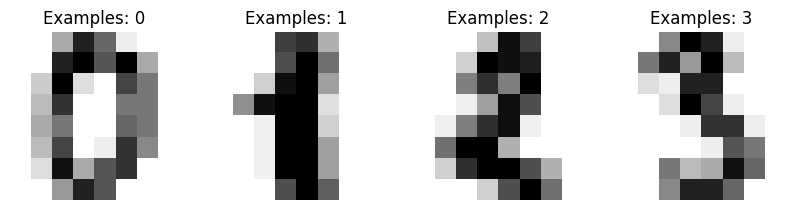

In [6]:
_, axes= plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image, label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Examples: %i" %label)

Data Preprocessing

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples= len(df.images)
data=df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

Scaling image data

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data=data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
 data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data, df.target, test_size=0.3)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

** Model Selection = Random Forest Model**

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [25]:
y_pred=model.predict(X_test)

In [26]:
y_pred

array([3, 1, 7, 7, 9, 7, 5, 4, 0, 3, 0, 7, 1, 5, 1, 6, 2, 8, 1, 5, 6, 9,
       2, 4, 7, 4, 0, 8, 0, 2, 1, 2, 0, 2, 0, 5, 2, 0, 2, 1, 1, 5, 0, 2,
       7, 6, 0, 9, 1, 5, 0, 1, 9, 7, 4, 4, 0, 9, 8, 4, 0, 3, 2, 4, 4, 2,
       3, 6, 7, 1, 3, 5, 3, 3, 3, 9, 3, 0, 0, 3, 8, 4, 0, 7, 4, 5, 1, 5,
       1, 0, 0, 4, 1, 3, 9, 6, 8, 5, 8, 4, 2, 7, 1, 2, 9, 3, 6, 6, 3, 4,
       7, 3, 6, 9, 9, 7, 9, 7, 6, 4, 8, 0, 6, 5, 2, 1, 4, 7, 8, 2, 4, 0,
       5, 1, 6, 5, 5, 4, 4, 6, 6, 6, 0, 3, 4, 6, 5, 3, 3, 3, 8, 7, 0, 9,
       6, 0, 1, 8, 8, 9, 4, 9, 2, 8, 0, 7, 8, 4, 6, 3, 5, 7, 7, 0, 6, 4,
       3, 8, 6, 8, 6, 1, 9, 3, 5, 3, 5, 1, 0, 7, 7, 1, 6, 2, 6, 1, 6, 0,
       9, 6, 2, 3, 6, 2, 4, 7, 3, 3, 5, 6, 5, 2, 7, 1, 4, 8, 0, 5, 0, 3,
       7, 7, 1, 1, 1, 7, 3, 8, 3, 6, 5, 5, 6, 5, 4, 8, 8, 6, 6, 3, 5, 1,
       8, 5, 6, 6, 5, 9, 7, 1, 7, 9, 2, 8, 3, 8, 6, 2, 4, 8, 2, 6, 8, 8,
       6, 1, 6, 4, 6, 6, 9, 7, 4, 5, 8, 6, 2, 4, 5, 8, 6, 1, 3, 5, 9, 5,
       0, 0, 7, 0, 1, 3, 6, 6, 1, 5, 8, 2, 6, 3, 9,

**Model Accuracy**

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 53,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  2,  1, 41]])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        53
           3       0.96      0.95      0.95        56
           4       1.00      0.97      0.98        64
           5       0.96      0.96      0.96        46
           6       0.99      0.99      0.99        67
           7       0.89      1.00      0.94        48
           8       0.96      0.98      0.97        54
           9       0.98      0.89      0.93        46

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.98      0.97      0.97       540

